In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
box = np.fromfile('deltaTb_z8.000_fesc_0.12_A_8.16e-01_C_0.86_m_0.342_h_0.690_s_0.750.dat', dtype=np.float32).reshape(200,200,200)*1e3

rms slice 11.925238


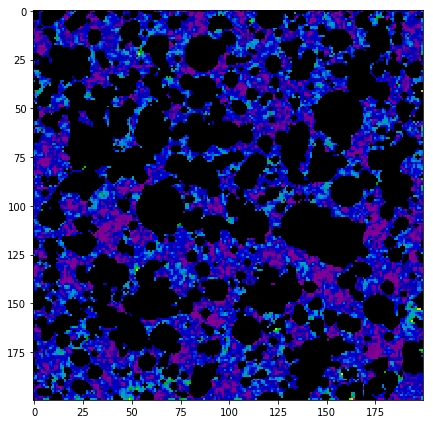

In [57]:
image = box[:,:,160]

print ('rms slice', np.std(image))

fig,ax = plt.subplots(1, figsize=(8,6))
ax.imshow(image, cmap='nipy_spectral')
fig.tight_layout()
plt.show()

In [58]:
#Calculate frequency resolution
#dnu=  nu0 Hz *  dx  / c *(1+z)**2,
nu0 = 1420.40575177 #MHz
#Hz  = H0 * sqt(omega_m * (1+z)^3  + omega_l)
Hz  = 70*np.sqrt(0.3*(1+8.)**3. + (1. - 0.7 )) 
dx  = 500./200. 
c   = 299792.458 # km/s 

dnu = nu0*Hz * dx / (  c* (1+8.)**2.  ) 

dnu, "MHz"

(0.15148401472872605, 'MHz')

In [59]:
# requires how many slices to get to 1 MHz

int(1.0 / dnu), 'slices'

(6, 'slices')

rms slice 11.925238 8.8173065


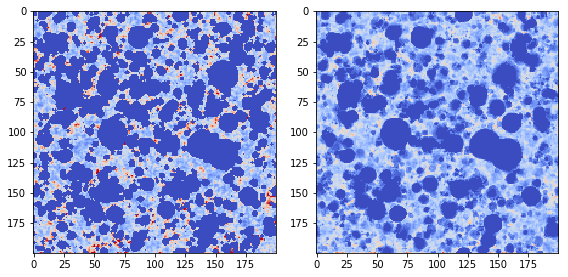

In [60]:
# check the average over 6 slices!

image   = box[:,:,160]
image_z = np.mean(box[:,:,160:166], axis=2)

print ('rms slice', np.std(image), np.std(image_z) )

vmin, vmax = min( [min(image.flatten()), min(image.flatten())] ), max( [ max(image_z.flatten()), max(image_z.flatten())])

clr = 'coolwarm'

fig,ax = plt.subplots(1,2,  figsize=(8,6))
ax[0].imshow(image, vmin=vmin, vmax=vmax, cmap=clr)
ax[1].imshow(image_z, vmin=vmin, vmax=vmax, cmap=clr)
fig.tight_layout()
plt.show()


In [61]:
# now lets chack the noise:
sigma_mk = 973*1.0e-6*1.0e-26/( 5. /60*np.pi/180)**2*(0.21*1420/190)**2/2/1.38064852e-23*np.sqrt(1.0e-4*190/1000)*1000
sigma_mk


1.788514010688016

In [62]:
theta = dx / 8943.15472063  * (3437.75)
round(theta), 'arcmin'

(1, 'arcmin')

In [63]:
from skimage.transform import resize

In [64]:

resize_image       =  resize(image_z, (40, 40), mode='wrap', anti_aliasing=True)
noise              =  np.random.normal(loc=0.0, scale=sigma_mk, size=(40,40))

print ( "rms resize", np.std(resize_image))


rms resize 6.058319668417021


rms resize 6.2890265255788345 8.8173065


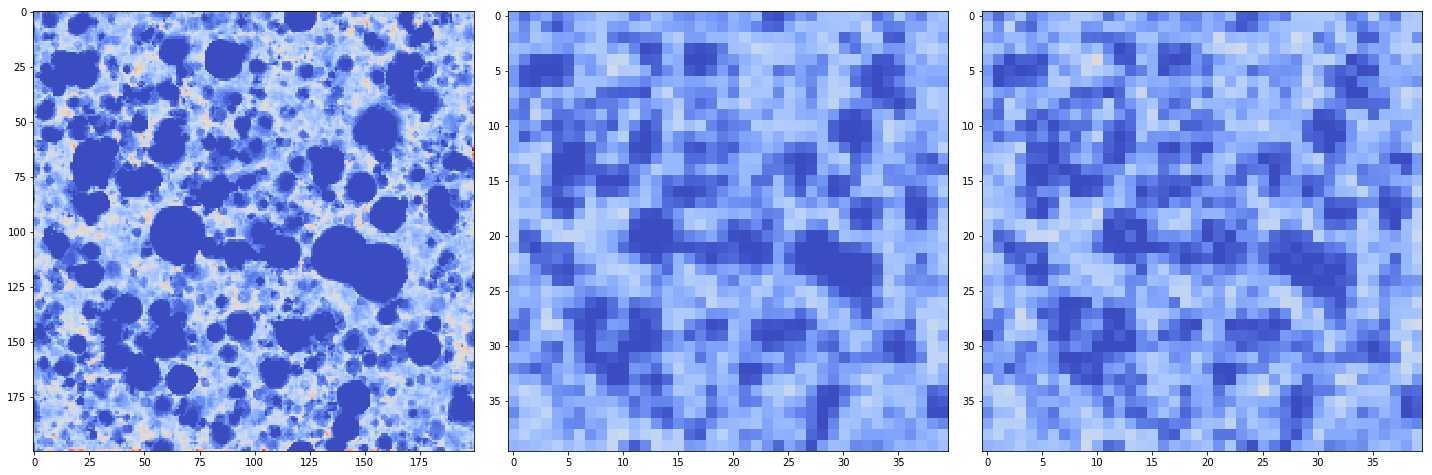

In [65]:

print ( "rms resize", np.std(resize_image + noise), np.std(image_z))
vmin, vmax = min( [min(resize_image.flatten()), min(resize_image.flatten())] ), max( [ max(image_z.flatten()), max(image_z.flatten())])

fig,ax = plt.subplots(1,3,  figsize=(20,10))
ax[0].imshow(image_z,vmin=vmin, vmax=vmax,  cmap=clr)
ax[1].imshow(resize_image,vmin=vmin, vmax=vmax, cmap=clr)#, interpolation='gaussian')
ax[2].imshow(resize_image+noise,vmin=vmin, vmax=vmax, cmap=clr)#, interpolation='gaussian')
fig.tight_layout()
plt.show()